In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm

In [2]:
df = pd.read_excel('sales data.xlsx')

df.head()

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,98320.37,77722.25,8/23/2020,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466
1,France,46296.26,40319.41,5/15/2020,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084
2,Portugal,140337.34,115708.14,2020-04-09 00:00:00,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141
3,France,203604.46,175344.16,6/26/2019,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106
4,UK,63979.04,56032.84,10/22/2019,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546


# Data Cleaning

In [3]:
missing_values = df.isnull().sum()

missing_values

,0
country,0
order_value_EUR,5
cost,0
date,0
category,0
customer_name,0
sales_manager,0
sales_rep,0
device_type,5
order_id,0


In [4]:
missing_values[missing_values > 0]

,0
order_value_EUR,5
device_type,5


In [5]:
imputer = SimpleImputer(strategy='median')

df['order_value_EUR'] = imputer.fit_transform(df[['order_value_EUR']])

In [6]:
imputer = SimpleImputer(strategy='most_frequent')

df['device_type'] = imputer.fit_transform(df[['device_type']]).ravel()

In [7]:
df.dtypes

,0
country,object
order_value_EUR,float64
cost,object
date,object
category,object
customer_name,object
sales_manager,object
sales_rep,object
device_type,object
order_id,object


In [8]:
df.shape

(1001, 10)

In [9]:
df = df[df['cost'] != 'XXX']
df.shape

(1000, 10)

In [10]:
df['cost'] = df['cost'].astype(float)
df['date'] = pd.to_datetime(df['date'])

In [11]:
df.head()

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,98320.37,77722.25,2020-08-23,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466
1,France,46296.26,40319.41,2020-05-15,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084
2,Portugal,140337.34,115708.14,2020-04-09,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141
3,France,203604.46,175344.16,2019-06-26,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106
4,UK,63979.04,56032.84,2019-10-22,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546


In [12]:
df[df.duplicated()]

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
23,UK,63979.04,56032.84,2019-10-22,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546


In [13]:
df = df.drop_duplicates()

In [14]:
df.shape

(999, 10)

# Data Manupulation

In [15]:
df.sort_values(by='cost', ascending=False)

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
986,UK,383996.760,304701.43,2019-12-19,Other,Johns and Sons,Jessamine Apark,Winny Agnolo,PC,42-7823733
84,Ireland,361182.870,288368.40,2019-02-12,Books,Smith Group,Glenine Suttaby,Bunnie Tonbridge,PC,44-1953194
413,Netherlands,353925.060,287528.72,2020-04-12,Clothing,Corwin and Sons,Denice Amberg,Nero Harbisher,PC,36-2694099
242,Luxembourg,312928.720,270401.71,2019-12-12,Beauty,Altenwerth-Konopelski,Ilsa Kob,Jocelyn Laurentino,Tablet,98-5257166
766,Sweden,325331.990,264592.51,2019-12-23,Games,Altenwerth-Konopelski,Maxie Marrow,Caro Morfield,Mobile,57-4142025
...,...,...,...,...,...,...,...,...,...,...
138,Sweden,17524.020,14122.61,2020-12-02,Books,Goldner-Dibbert,Maxie Marrow,Madelon Bront,Mobile,02-3364199
971,Netherlands,105357.645,14102.75,2020-07-02,Clothing,Johns and Sons,Denice Amberg,Nero Harbisher,PC,38-5910704
17,Sweden,15817.050,13743.44,2019-10-03,Clothing,Kihn Inc,Maxie Marrow,Anita Woakes,PC,26-9787272
275,France,16388.900,13430.70,2020-03-15,Electronics,West-Cummings,Othello Bowes,Crysta Halls,PC,30-9690927


In [16]:
df[(df['country'] == 'Sweden') & (df['category'] == 'Games')]

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,98320.37,77722.25,2020-08-23,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466
109,Sweden,106142.65,88151.47,2019-04-06,Games,Baumbach Group,Maxie Marrow,Anita Woakes,PC,29-5632797
134,Sweden,78542.59,68010.03,2019-05-26,Games,Kihn Inc,Maxie Marrow,Caro Morfield,PC,02-9523107
139,Sweden,57927.54,48914.01,2019-01-18,Games,"Fisher, Morar and Skiles",Maxie Marrow,Alyosha Meah,Mobile,67-6692861
148,Sweden,93996.68,77171.27,2020-10-10,Games,"Swaniawski, Runolfsson and Green",Maxie Marrow,Alyosha Meah,Mobile,75-0683725
155,Sweden,78679.60,62416.53,2019-12-10,Games,Stehr LLC,Maxie Marrow,Tarrah Castelletti,PC,10-1511807
230,Sweden,171748.56,136574.45,2020-11-20,Games,Walter LLC,Maxie Marrow,Madelon Bront,PC,74-0214938
262,Sweden,53849.12,47354.92,2020-04-15,Games,"Rowe, Hermiston and Kessler",Maxie Marrow,Alyosha Meah,PC,83-9569509
397,Sweden,108978.79,95432.73,2019-11-28,Games,"Bashirian, Okuneva and Bechtelar",Maxie Marrow,Madelon Bront,PC,84-5276032
422,Sweden,15100.57,12113.68,2019-02-20,Games,"Murray, Reichel and Nolan",Maxie Marrow,Tarrah Castelletti,PC,89-2424262


In [17]:
merged_df = df.merge(pd.read_excel('Extra Variable.xlsx'), on='order_id')
merged_df

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id,refund
0,Sweden,98320.37,77722.25,2020-08-23,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466,43621
1,France,46296.26,40319.41,2020-05-15,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084,13385
2,Portugal,140337.34,115708.14,2020-04-09,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141,69535
3,France,203604.46,175344.16,2019-06-26,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106,90064
4,UK,63979.04,56032.84,2019-10-22,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546,24176
...,...,...,...,...,...,...,...,...,...,...,...
994,France,69126.50,55902.60,2019-08-12,Electronics,"Farrell, Swaniawski and Crist",Othello Bowes,Avrit Chanders,PC,07-3201531,27600
995,France,140943.88,120633.87,2020-05-28,Appliances,Armstrong-Little,Othello Bowes,Avrit Chanders,Tablet,77-0650807,69762
996,France,124784.67,106853.11,2020-05-22,Electronics,"Swaniawski, Runolfsson and Green",Othello Bowes,Ora Grennan,Tablet,44-2757396,60614
997,Germany,61968.26,50690.04,2020-12-27,Electronics,Romaguera-Dietrich,Rickard Doogood,Casie MacBain,PC,22-7259031,23360


In [18]:
final_df = pd.concat([merged_df, pd.read_excel('Extra Data.xlsx')])
final_df

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id,refund
0,Sweden,98320.37,77722.25,2020-08-23 00:00:00,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466,43621
1,France,46296.26,40319.41,2020-05-15 00:00:00,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084,13385
2,Portugal,140337.34,115708.14,2020-04-09 00:00:00,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141,69535
3,France,203604.46,175344.16,2019-06-26 00:00:00,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106,90064
4,UK,63979.04,56032.84,2019-10-22 00:00:00,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546,24176
...,...,...,...,...,...,...,...,...,...,...,...
5,Spain,84900.24,73701.90,7/14/2020,Clothing,"Farrell, Swaniawski and Crist",Emalia Dinse,Perri Aldersley,PC,60-6998932,7598
6,Finland,116563.40,92807.78,9/26/2019,Games,Hilll-Vandervort,Hube Corey,Wat Bowkley,Mobile,28-6585323,2928
7,UK,156585.22,126599.15,8/30/2020,Accessories,"Hermiston, Simonis and Wisoky",Jessamine Apark,Winny Agnolo,PC,64-5761908,9376
8,Spain,178763.42,146621.76,12/22/2019,Games,Johns and Sons,Emalia Dinse,Bertha Walbrook,Tablet,15-8765160,5153


# Exploratory Data Analysis

In [19]:
# country with the majority of our customers

country_freq = final_df['country'].value_counts()
country_freq

,count
country,
Portugal,242
France,233
Sweden,183
UK,102
Finland,45
Ireland,43
Bulgaria,30
Netherlands,28
Spain,28


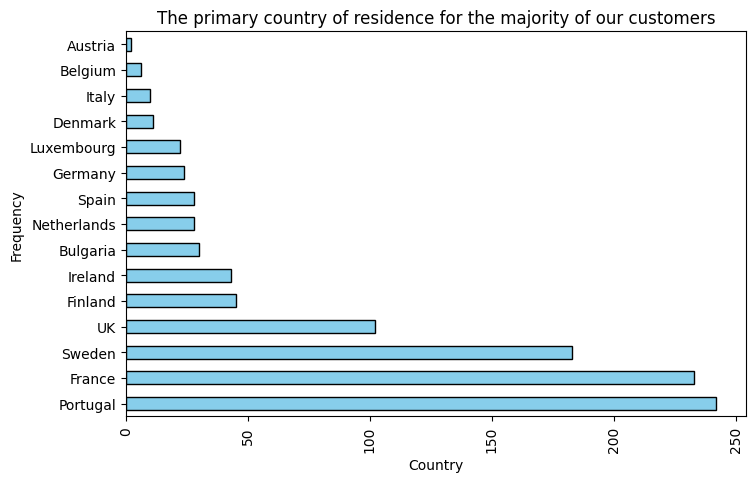

In [20]:
plt.figure(figsize=(8, 5))

country_freq.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('The primary country of residence for the majority of our customers')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

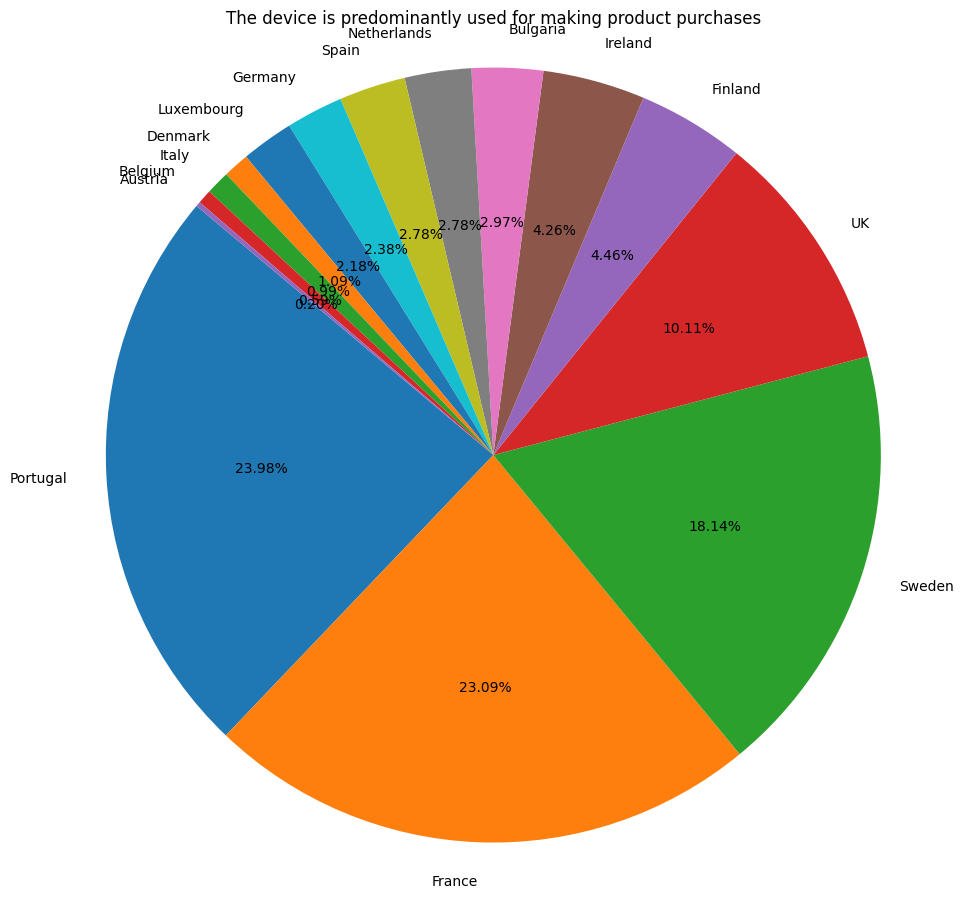

In [21]:
country_percentages = (country_freq / country_freq.sum()) * 100

plt.figure(figsize=(11, 11))
plt.pie(country_percentages, labels=country_percentages.index, autopct='%1.2f%%', startangle=140)
plt.title('The device is predominantly used for making product purchases')

plt.axis('equal')
plt.show()

In [22]:
# final_df[['order_value_EUR', 'cost', 'refund']].describe()

# OR

final_df.describe()

,order_value_EUR,cost,refund
count,1009.000000,1009.000000,1009.000000
mean,113267.885208,94422.763518,49236.007929
std,61615.866535,51693.620772,28744.989463
min,15100.570000,12113.680000,1009.000000
25%,65760.390000,54635.770000,24597.000000
50%,105357.645000,86928.030000,48652.000000
75%,151012.120000,126080.020000,74664.000000
max,383996.760000,304701.430000,99539.000000


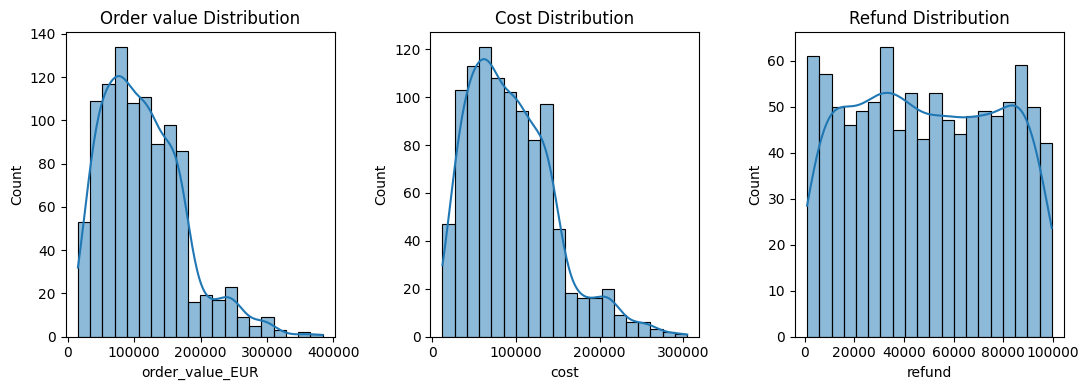

In [23]:
plt.figure(figsize=(11, 4))

plt.subplot(131)  # 1 row, 3 columns, first subplot
sns.histplot(final_df['order_value_EUR'], kde=True, bins=20)
plt.title('Order value Distribution')

plt.subplot(132)  # 1 row, 3 columns, second subplot
sns.histplot(final_df['cost'], kde=True, bins=20)
plt.title('Cost Distribution')

plt.subplot(133)  # 1 row, 3 columns, third subplot
sns.histplot(final_df['refund'], kde=True, bins=20)
plt.title('Refund Distribution')

plt.tight_layout()
plt.show()

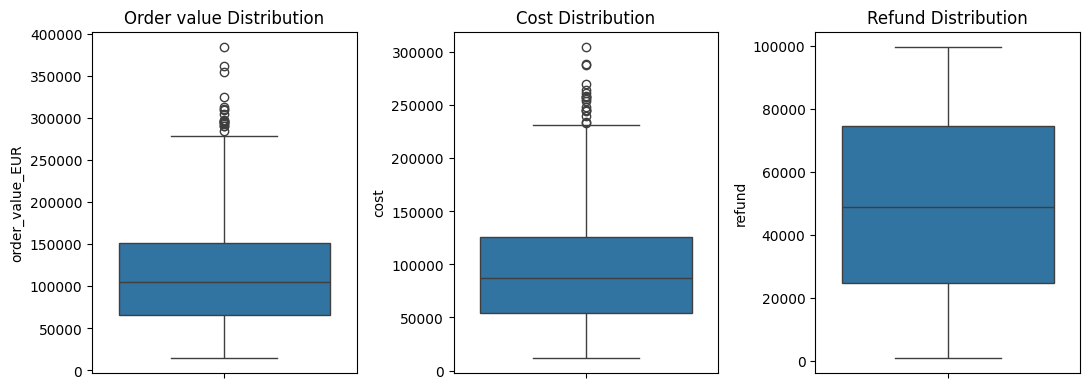

In [24]:
plt.figure(figsize=(11, 4))

plt.subplot(131)  # 1 row, 3 columns, first subplot
sns.boxplot(final_df['order_value_EUR'])
plt.title('Order value Distribution')

plt.subplot(132)  # 1 row, 3 columns, second subplot
sns.boxplot(final_df['cost'])
plt.title('Cost Distribution')

plt.subplot(133)  # 1 row, 3 columns, third subplot
sns.boxplot(final_df['refund'])
plt.title('Refund Distribution')

plt.tight_layout()
plt.show()

In [25]:
# top product categories based on order value.

final_df.groupby('category')['order_value_EUR'].median().sort_values(ascending = False)

,order_value_EUR
category,
Accessories,139619.740
Outdoors,111875.915
Smartphones,111639.290
Games,108125.365
Clothing,103726.570
Beauty,103345.925
Appliances,100978.490
Electronics,99809.630
Books,99518.860


In [26]:
# most loyal customers

pivot_table = df.pivot_table(index='customer_name',
                             values=['order_value_EUR', 'cost'],
                             aggfunc={'order_value_EUR': 'median', 'cost': 'median', 'customer_name': 'count'})

pivot_table = pivot_table.rename(columns={'order_value_EUR': 'Median_Sales_EUR',
                                          'cost': 'Median_Cost',
                                          'customer_name': 'Count'})

top_10 = pivot_table.sort_values(by = 'Count', ascending = False).head(10)
top_10

,Median_Cost,Count,Median_Sales_EUR
customer_name,,,
Johns and Sons,86679.665,142,105900.99
Hessel-Stiedemann,80342.700,55,98322.98
"Swaniawski, Runolfsson and Green",84690.350,25,100094.97
"Dickinson, Hyatt and Berge",85886.100,24,104540.68
"Murray, Reichel and Nolan",71501.100,23,88832.28
"Rowe, Hermiston and Kessler",66065.680,22,77690.89
Kihn Inc,66742.150,22,80450.08
Larkin-Collier,101516.450,21,126974.92
Tillman and Sons,75839.400,21,91350.76


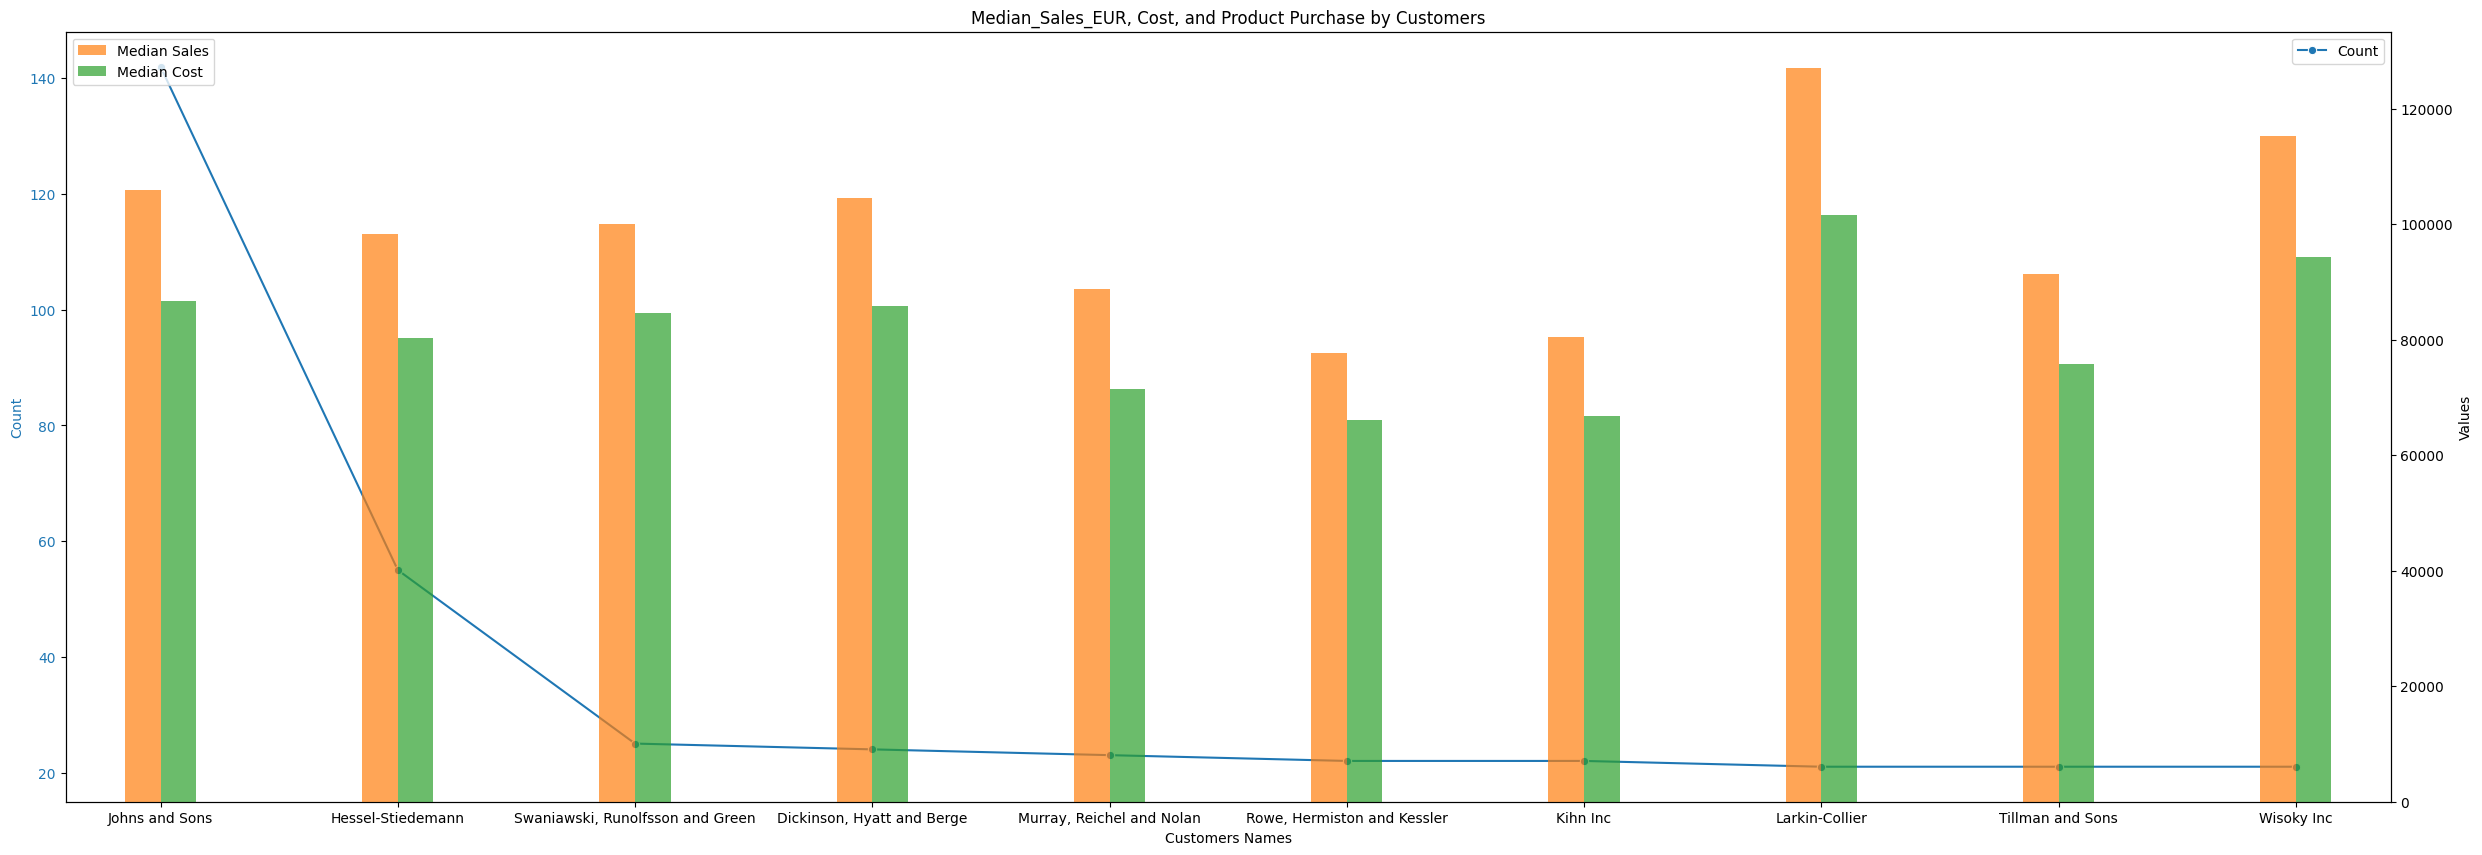

In [27]:
fig, ax1 = plt.subplots(figsize=(30, 10))

sns.lineplot(data=top_10['Count'], marker='o', ax=ax1, color='tab:blue', label='Count')
ax1.set_xlabel('Customers Names')
ax1.set_ylabel('Count', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
bar_plot = top_10[['Median_Sales_EUR', 'Median_Cost']].plot(kind='bar', ax=ax2, width=0.3, color=['tab:orange', 'tab:green'], alpha=0.7)
ax2.set_ylabel('Values', color='black')
ax2.tick_params(axis='y', labelcolor='black')

bar_plot.set_xticks(range(len(top_10)))
bar_plot.set_xticklabels(top_10.index, rotation=90, ha='center')

plt.title('Median_Sales_EUR, Cost, and Product Purchase by Customers')
ax2.legend(loc='upper left', labels=['Median Sales', 'Median Cost'])

plt.show()

In [28]:
# under which sales manager, which product category has the highest sales volume

crosstab = pd.crosstab(final_df['sales_manager'], final_df['category'])
crosstab

category,Accessories,Appliances,Beauty,Books,Clothing,Electronics,Games,Other,Outdoors,Smartphones
sales_manager,,,,,,,,,,
Celine Tumasian,8,30,27,27,40,28,40,6,13,23
Charil Alpe,1,4,2,6,3,4,5,0,2,3
Denice Amberg,0,2,1,4,6,4,4,0,2,5
Emalia Dinse,0,1,4,1,5,7,5,2,1,2
Glenine Suttaby,1,3,6,3,6,7,6,2,3,6
Hube Corey,1,8,6,2,8,5,12,1,2,0
Ilsa Kob,2,2,3,3,3,2,3,0,2,2
Jessamine Apark,7,11,10,14,18,8,14,2,10,8
Lambert Norheny,1,2,0,0,1,0,1,0,0,1


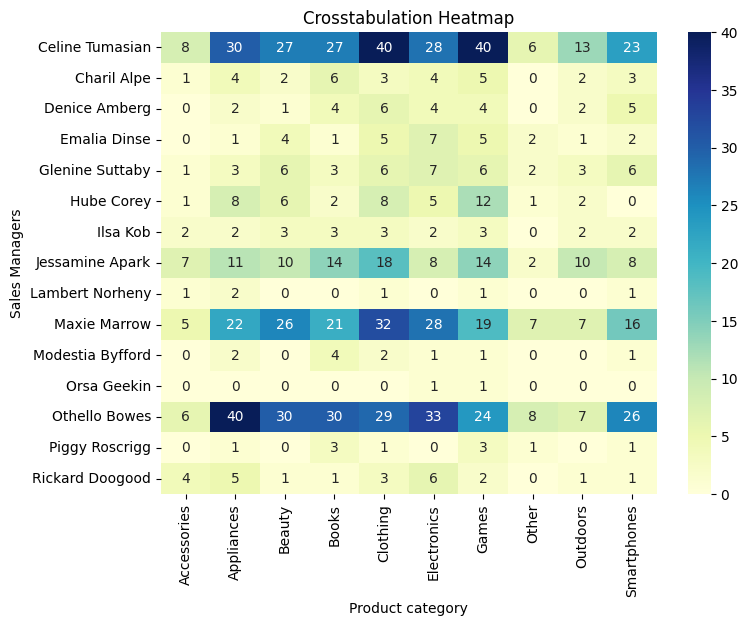

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, cmap="YlGnBu", fmt='d', cbar=True)
plt.title('Crosstabulation Heatmap')
plt.xlabel('Product category')
plt.ylabel('Sales Managers')

plt.show()

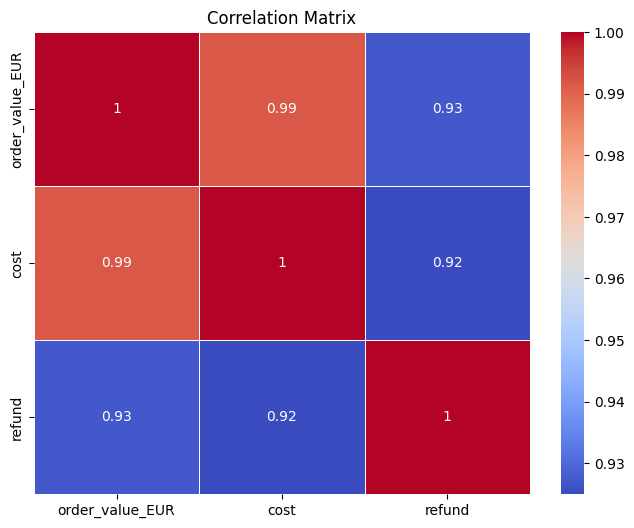

In [30]:
# relationship between order value, cost and refund amount

correlation_matrix = final_df[['order_value_EUR', 'cost', 'refund']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Data Transformation using Statistics

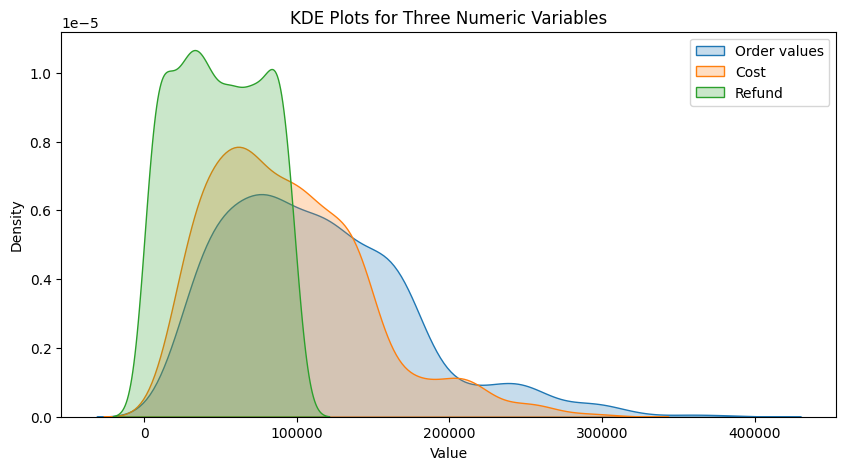

In [31]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(final_df['order_value_EUR'], label="Order values", fill=True)

sns.kdeplot(final_df['cost'], label="Cost", fill=True)

sns.kdeplot(final_df['refund'], label="Refund", fill=True)

plt.title('KDE Plots for Three Numeric Variables')
plt.xlabel('Value')
plt.ylabel('Density')

plt.legend()

plt.show()

### Square root method

<Axes: xlabel='order_value_EUR', ylabel='Density'>

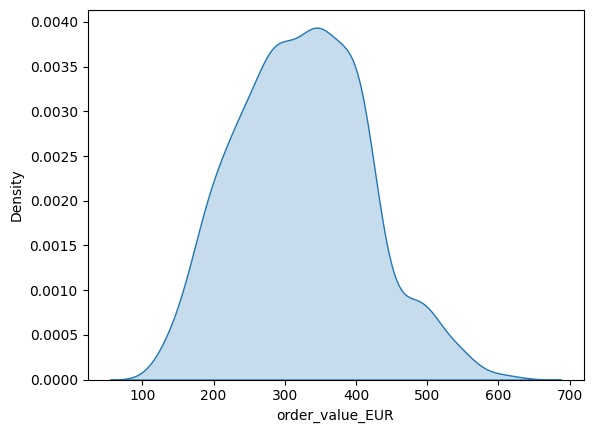

In [32]:
sqrt_orderval = np.sqrt(final_df['order_value_EUR'])

sns.kdeplot(sqrt_orderval, fill=True)

<Axes: xlabel='cost', ylabel='Density'>

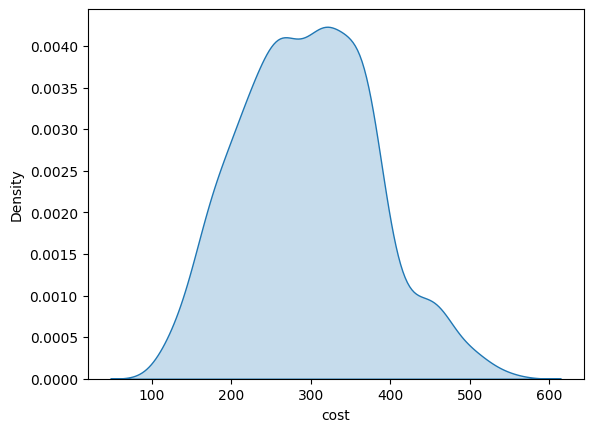

In [33]:
sqrt_cost = np.sqrt(final_df['cost'])

sns.kdeplot(sqrt_cost, fill=True)

<Axes: xlabel='refund', ylabel='Density'>

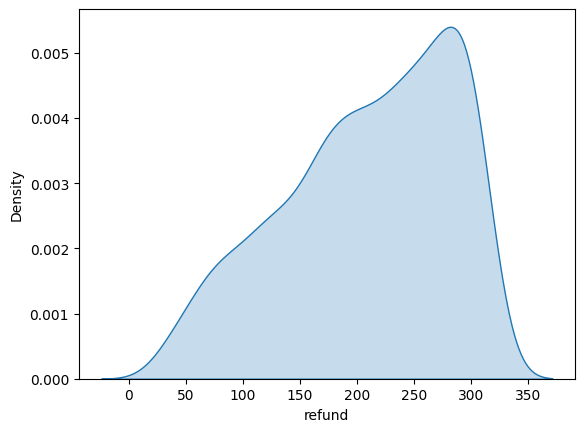

In [34]:
sqrt_refund = np.sqrt(final_df['refund'])

sns.kdeplot(sqrt_refund, fill=True)

### Logarithmic method

<Axes: xlabel='order_value_EUR', ylabel='Density'>

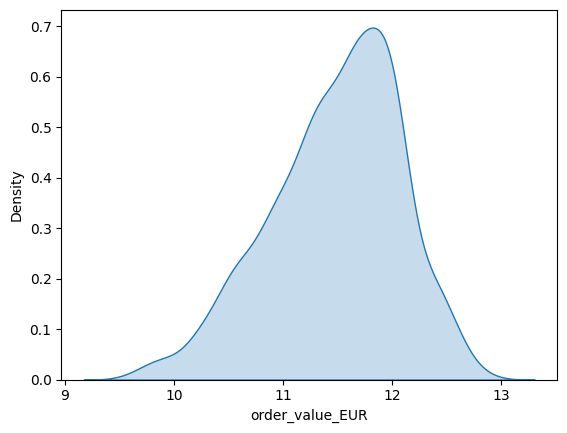

In [35]:
log_orderval = np.log(final_df['order_value_EUR'])

sns.kdeplot(log_orderval, fill=True)

<Axes: xlabel='cost', ylabel='Density'>

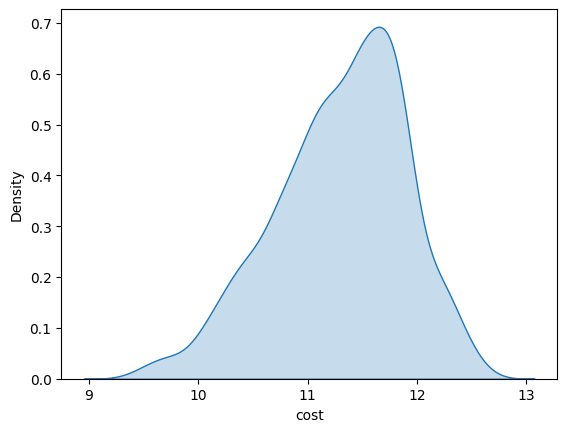

In [36]:
log_cost = np.log(final_df['cost'])

sns.kdeplot(log_cost, fill=True)

<Axes: xlabel='refund', ylabel='Density'>

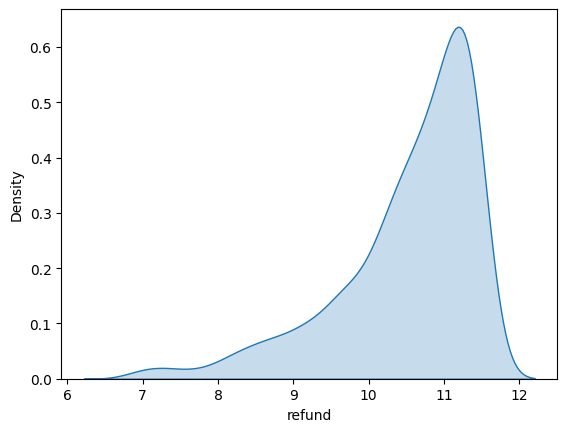

In [37]:
log_refund = np.log(final_df['refund'])

sns.kdeplot(log_refund, fill=True)

### Box-Cox method

<Axes: ylabel='Density'>

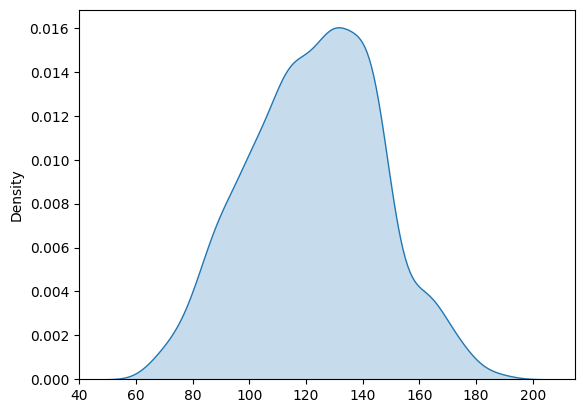

In [38]:
boxcox_orderval, lambda_value = stats.boxcox(final_df['order_value_EUR'])

sns.kdeplot(boxcox_orderval, fill=True)

<Axes: ylabel='Density'>

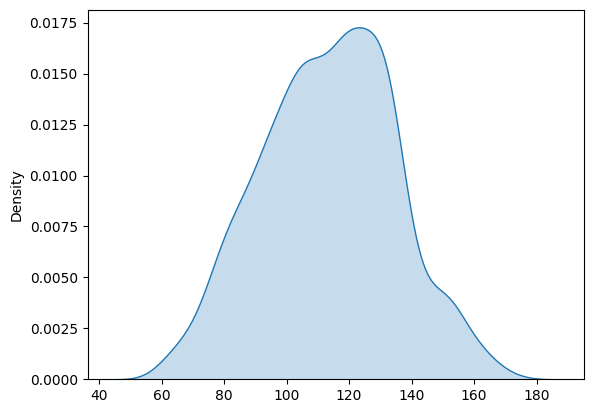

In [39]:
boxcox_cost, lambda_value = stats.boxcox(final_df['cost'])

sns.kdeplot(boxcox_cost, fill=True)

<Axes: ylabel='Density'>

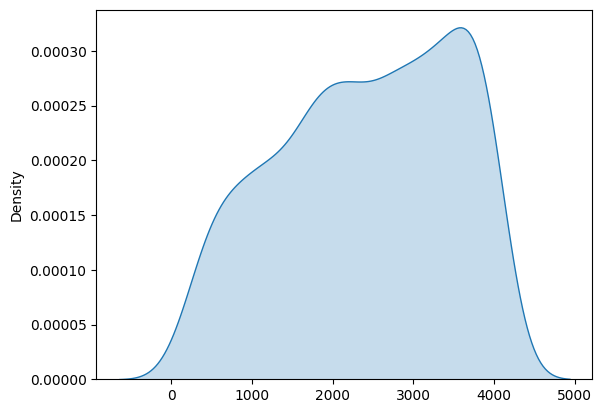

In [40]:
boxcox_refund, lambda_value = stats.boxcox(final_df['refund'])

sns.kdeplot(boxcox_refund, fill=True)

### Yeo-Johnson method

<Axes: ylabel='Density'>

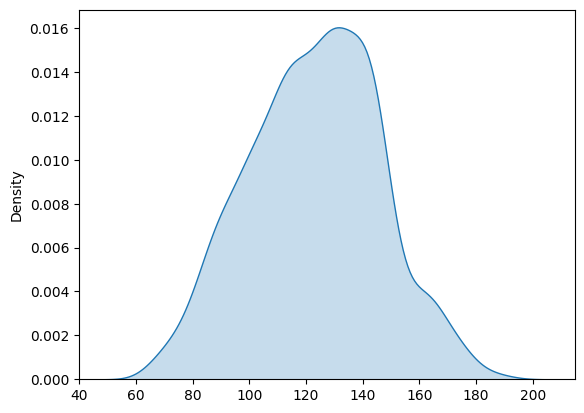

In [41]:
yeo_orderval, lambda_value = stats.yeojohnson(final_df['order_value_EUR'])

sns.kdeplot(yeo_orderval, fill=True)

<Axes: ylabel='Density'>

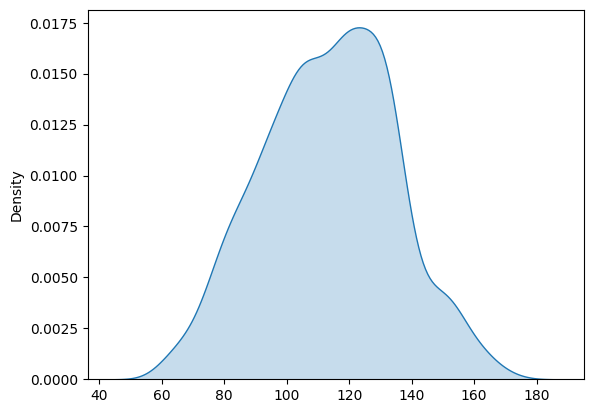

In [42]:
yeo_cost, lambda_value = stats.yeojohnson(final_df['cost'])

sns.kdeplot(yeo_cost, fill=True)

<Axes: ylabel='Density'>

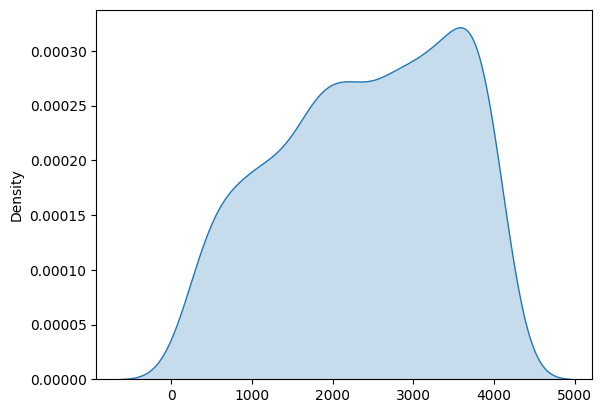

In [43]:
yeo_refund, lambda_value = stats.yeojohnson(final_df['refund'])

sns.kdeplot(yeo_refund, fill=True)

# Hypothesis Testing

### One Way ANOVA

In [44]:
# Is there any significant difference in the cost of goods sold among the three types of devices used by the customers while placing an order?

final_df['yeo_cost'] = yeo_cost

data = [final_df[final_df['device_type'] == 'PC'], final_df[final_df['device_type'] == 'Tablet'], final_df[final_df['device_type'] == 'Mobile']]

k = len(data)
N = len(data[0]) + len(data[1]) + len(data[2])
df1 = k - 1
df2 = N - k

alpha = 0.05

f_critical = stats.f.ppf(1 - alpha, df1, df2)
print("Critical F-statistic value:", f_critical)

f_statistic, p_value = stats.f_oneway(data[0]['yeo_cost'], data[1]['yeo_cost'], data[2]['yeo_cost'])
print("One-way ANOVA F-statistic:", f_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference among the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference among the groups.")

Critical F-statistic value: 3.004679808466159
One-way ANOVA F-statistic: 1.137886451692206
P-value: 0.32090824126771583
Fail to reject the null hypothesis: There is no significant difference among the groups.


### Pearson Correlation

In [45]:
# Is there any statistically significant relationship between order value, cost and refund?

correlation1, p_value1 = stats.pearsonr(boxcox_orderval, yeo_cost)
correlation2, p_value2 = stats.pearsonr(boxcox_orderval, final_df['refund'])
correlation3, p_value3 = stats.pearsonr(final_df['refund'], yeo_cost)

alpha = 0.05

print("Correlation between order value and cost:", correlation1)
print(f"P-value: {p_value1}")

if p_value1 < alpha:
    print("Correlation between order value and cost is statistically significant. \n")
else:
    print("Correlation between  order value and cost is not statistically significant. \n")

print("Correlation between order value and refund:", correlation2)
print(f"P-value: {p_value2}")

if p_value2 < alpha:
    print("Correlation between order value and refund is statistically significant. \n")
else:
    print("Correlation between order value and refund is not statistically significant. \n")


print("Correlation between cost and refund:", correlation3)
print(f"P-value: {p_value3}")

if p_value3 < alpha:
    print("Correlation between cost and refund is statistically significant.")
else:
    print("Correlation between cost and refund is not statistically significant.")


Correlation between order value and cost: 0.9922541547530425
P-value: 0.0
Correlation between order value and cost is statistically significant. 

Correlation between order value and refund: 0.9597956422648426
P-value: 0.0
Correlation between order value and refund is statistically significant. 

Correlation between cost and refund: 0.9535863737842777
P-value: 0.0
Correlation between cost and refund is statistically significant.


### Multiple Regression

In [46]:
# Is there any significant impact of order value and cost on the refund amount?

X = sm.add_constant(np.column_stack((boxcox_orderval, yeo_cost)))

model = sm.OLS(final_df['refund'], X).fit()

coefficients = model.params

print("Regression Coefficients:")
print("Intercept:", coefficients.iloc[0])
print("Order Value Coefficient:", coefficients.iloc[1])
print("Cost Coefficient:", coefficients.iloc[2])

print("\nRegression Summary:")
print(model.summary())

Regression Coefficients:
Intercept: -97940.23842172147
Order Value Coefficient: 1099.3040356848699
Cost Coefficient: 107.14395531307571

Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                 refund   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     5889.
Date:                Sun, 25 May 2025   Prob (F-statistic):               0.00
Time:                        06:47:07   Log-Likelihood:                -10507.
No. Observations:                1009   AIC:                         2.102e+04
Df Residuals:                    1006   BIC:                         2.104e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t